### Problem Statement:

You are a data scientist / AI engineer working on a multiclass classification problem. You have been provided with a dataset named **`"dry_bean_dataset.xlsx"`**, which includes various features of dry beans to predict their class. The dataset comprises the following columns:

- `area:` The area of a bean zone and the number of pixels within its boundaries.
- `perimeter:` Bean circumference is defined as the length of its border.
- `majorAxisLength:` The distance between the ends of the longest line that can be drawn from a bean.
- `minorAxisLength:` The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- `aspectRatio:` Defines the relationship between the major and minor axis lengths.
- `eccentricity:` Eccentricity of the ellipse having the same moments as the region.
- `convexArea:` Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- `equivDiameter:` The diameter of a circle having the same area as a bean seed area.
- `extent:` The ratio of the pixels in the bounding box to the bean area.
- `solidity:` Also known as convexity, the ratio of the pixels in the convex shell to those found in beans.
- `roundness:` Calculated with the formula: (4 * π * Area) / (Perimeter^2).
- `compactness:` Measures the roundness of an object: EquivalentDiameter / MajorAxisLength.
- `shapeFactor1:` The ratio of Area to the square of Perimeter.
- `shapeFactor2:` The ratio of Area to the square of MajorAxisLength.
- `shapeFactor3:` The ratio of Area to the product of MajorAxisLength and MinorAxisLength.
- `shapeFactor4:` The ratio of Perimeter to the product of MajorAxisLength and MinorAxisLength.
- `class:` The class of the bean (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, and Sira).

Your task is to use this dataset to build and evaluate a Logistic Regression model to classify the beans into their respective classes.

### Dataset Citation
This dataset is used under citation guidelines from the original authors. For detailed study and dataset description, see the following references:

- **Citation**: KOKLU, M. and OZKAN, I.A., (2020), Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques. Computers and Electronics in Agriculture, 174, 105507. DOI: https://doi.org/10.1016/j.compag.2020.105507 
- **Dataset available at**: [Murat Koklu's Dataset Page](https://www.muratkoklu.com/datasets/)

**Import Necessary Libraries**

In [6]:
#Import Necessary Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder ,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix 

### Task 1: Data Preparation and Exploration

1. Import the data from the `"dry_bean_dataset.xlsx"` file and store it in a DataFrame.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset and handle them appropriately.
5. Check the distribution of classes in the target variable.
6. Visualize the distribution of features `(area, perimeter, major_axis_length, minor_axis_length)` using scatter plots.

In [7]:
# Step 1: Import the data
df = pd.read_excel("dry_bean_dataset.xlsx")

# Step 2: Display the number of rows and columns
print("shape of dataset:",df.shape)


# Step 3: Display the first few rows of the dataset
df.head()

shape of dataset: (13611, 17)


,area,perimeter,major_axis_length,minor_axis_length,aspect_ratio,eccentricity,convex_area,equiv_diameter,extent,solidity,roundness,compactness,shape_factor1,shape_factor2,shape_factor3,shape_factor4,class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [8]:
# Step 4: Check for any missing values
df.isnull().sum()

area                 0
perimeter            0
major_axis_length    0
minor_axis_length    0
aspect_ratio         0
eccentricity         0
convex_area          0
equiv_diameter       0
extent               0
solidity             0
roundness            0
compactness          0
shape_factor1        0
shape_factor2        0
shape_factor3        0
shape_factor4        0
class                0
dtype: int64

class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64


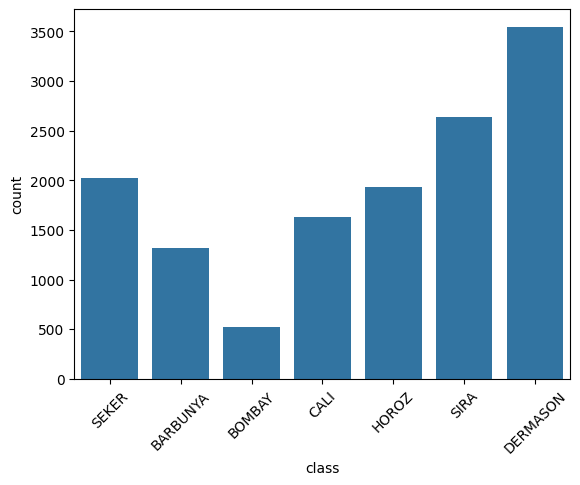

In [10]:
# Step 5: Check the distribution of classes in the target variable
print(df['class'].value_counts())

sns.countplot(data=df,x = 'class')
plt.xticks(rotation=45)
plt.show()

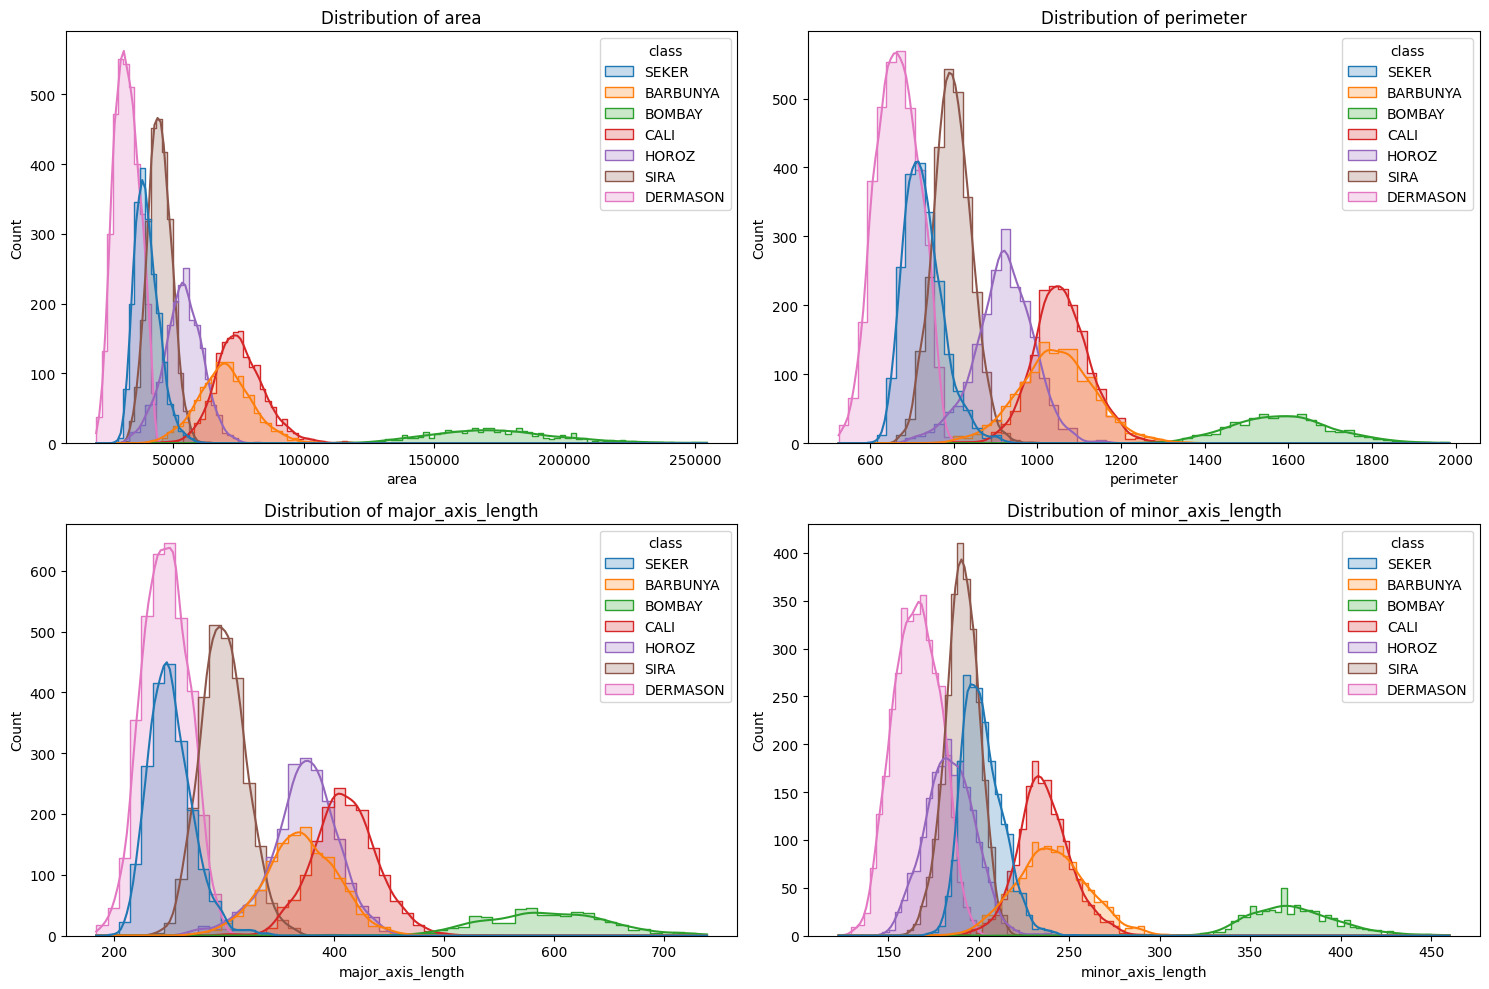

In [12]:
# Step 6: Visualize the distribution of features (area, perimeter, major_axis_length, minor_axis_length) using scatter plots.
features = ['area', 'perimeter', 'major_axis_length', 'minor_axis_length']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)   # 2 rows, 2 cols
    sns.histplot(data=df, x=feature, hue='class', kde=True, element="step")
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

### Task 2: Data Preprocessing

1. Select the features (all columns except 'class') and the target variable for modeling.
   
2. Split the data into training and testing sets with a test size of 30%.

In [15]:
# Step 1: Select features and target variable
X = df.drop(columns = ["class"])
y = df['class']
# Step 2: Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42 ,stratify=y)

print("Training set :", X_train.shape,y_train.shape)
print("Test set :", X_test.shape,y_test.shape)

Training set : (9527, 16) (9527,)
Test set : (4084, 16) (4084,)


### Task 3: Model Training and Evaluation Using Logistic Regression

1. Initialize and train a Logistic Regression model using the training data.
2. Make predictions on the test set using the trained model.
3. Evaluate the model using a classification report and print the report.
4. Plot the confusion matrix for the Logistic Regression model.

In [18]:
# Step 1: Initialize and train a Logistic Regression model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#initialize and train Logistic Regression
model = LogisticRegression(max_iter=1000,random_state = 42)
model.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [21]:
# Step 2: Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Step 3: Evaluate the model using a classification report and print the report.
from sklearn.metrics import classification_report,accuracy_score
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report :\n:",classification_report(y_test,y_pred))


Accuracy: 0.9218903036238981

Classification Report :
:               precision    recall  f1-score   support

    BARBUNYA       0.95      0.90      0.93       397
      BOMBAY       1.00      1.00      1.00       157
        CALI       0.94      0.94      0.94       489
    DERMASON       0.92      0.90      0.91      1064
       HOROZ       0.96      0.96      0.96       578
       SEKER       0.93      0.95      0.94       608
        SIRA       0.85      0.88      0.86       791

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



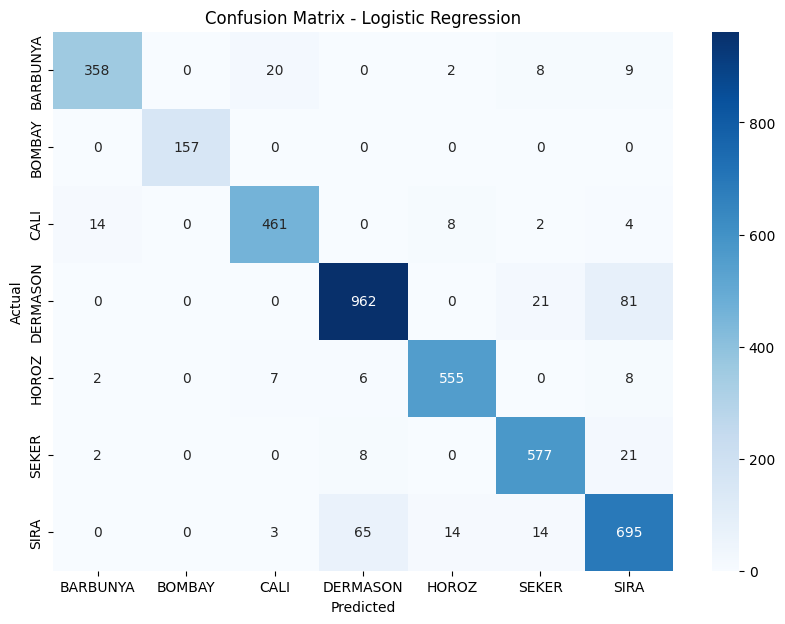

In [22]:
# Step 4: Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test,y_pred,labels = model.classes_)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### Task 4: Train Logistic Regression with Specific Parameters

1. Train a Logistic Regression model with specified parameters:
    - Max iterations: 300
    - Regularization strength (C): 0.5
    - 'tol': 0.001
    - class_weight: 'balanced'
<br></br>

Learn about these parameters here: [scikit-learn LogisticRegression Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

-------------------------------------------------------------------------------------------------------------------------------------------------------



2. Make predictions on the test set using the trained model.
   
3. Evaluate the model using a classification report and print the report.
   
4. Plot the confusion matrix for this Logistic Regression model.


In [23]:
# Step 1: Train a Logistic Regression model with specified parameters
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

# Train Logistic Regression with specified parameters
model2 = LogisticRegression(max_iter=300, C=0.5, tol=0.001, class_weight='balanced', random_state=42)
model2.fit(X_train_scaled, y_train)
# Step 2: Make predictions on the test set
y_pred2 = model2.predict(X_test_scaled)



In [24]:
# Step 3: Evaluate the model using a classification report
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("\nClassification Report:\n", classification_report(y_test, y_pred2))


Accuracy: 0.9145445641527914

Classification Report:
               precision    recall  f1-score   support

    BARBUNYA       0.95      0.91      0.93       397
      BOMBAY       1.00      1.00      1.00       157
        CALI       0.93      0.94      0.94       489
    DERMASON       0.94      0.87      0.90      1064
       HOROZ       0.96      0.96      0.96       578
       SEKER       0.92      0.95      0.93       608
        SIRA       0.82      0.88      0.85       791

    accuracy                           0.91      4084
   macro avg       0.93      0.93      0.93      4084
weighted avg       0.92      0.91      0.91      4084



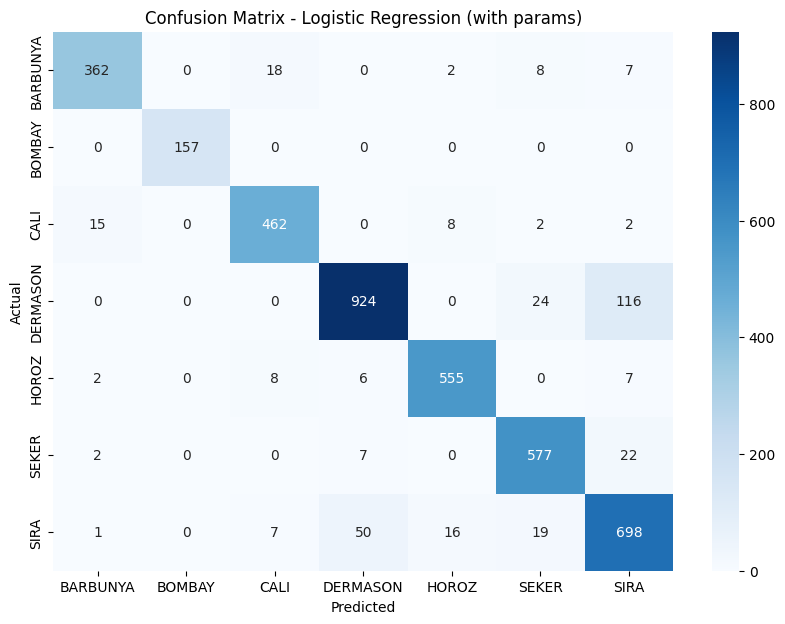

In [25]:
# Step 4: Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred2, labels=model2.classes_)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=model2.classes_, yticklabels=model2.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (with params)")
plt.show()